In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import os
import random
from sklearn import datasets
from autoencoder_regularized import ae_encoding
from pca import pca_encoding

In [2]:
# Datasets (can be downloaded from the UCI repository or the sources cited in the paper)
df = pd.read_csv("/Users/dcac/Data/Soft_Sensors/debutanizer.csv")
# df = pd.read_csv("/Users/dcac/Data/Soft_Sensors/SRU2.csv")

In [3]:
# Splitting into X and y
features = df.drop(["y"], axis=1)
y = df["y"]

In [4]:
# Extracting features
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
encoded_features_ae, w_ae1, w_ae2 = ae_encoding(x=features, encoding_dim=2, learning_rate=0.001, num_epochs=1000,
                                  batch_size=100, optimizer=torch.optim.Adam, lambda_param=0)
encoded_features_ae_reg, w_ae_reg1, w_ae_reg2 = ae_encoding(x=features, encoding_dim=2, learning_rate=0.001, num_epochs=1000,
                                      batch_size=100, optimizer=torch.optim.Adam, lambda_param=2)
encoded_features_pca, w_pca = pca_encoding(x=features, encoding_dim=2)

Training: 100%|██████████| 1000/1000 [00:10<00:00, 97.44it/s, loss=274.747818]


In [5]:
# Left singular vector (perform singular value decomposition (SVD))
w_ae2_ls, _, _ = np.linalg.svd(w_ae2)
w_ae_reg2_ls, _, _ = np.linalg.svd(w_ae_reg2)

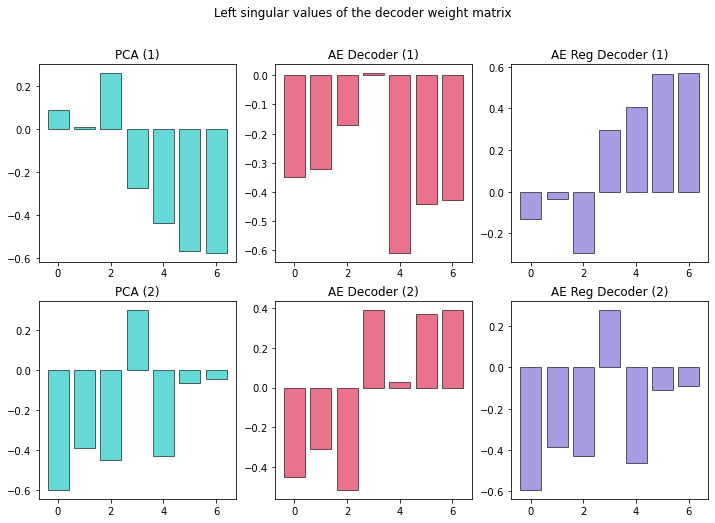

In [6]:
# Plotting the weights of PCA and the Decoder weights
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].bar(np.arange(features.shape[1]), w_pca[0], color="c", alpha=0.6, edgecolor='black')
axs[0, 0].set_title('PCA (1)')
axs[0, 1].bar(np.arange(features.shape[1]), w_ae2_ls.T[0], color="crimson", alpha=0.6, edgecolor='black')
axs[0, 1].set_title('AE Decoder (1)')
axs[0, 2].bar(np.arange(features.shape[1]), w_ae_reg2_ls.T[0], color="slateblue", alpha=0.6, edgecolor='black')
axs[0, 2].set_title('AE Reg Decoder (1)')
axs[1, 0].bar(np.arange(features.shape[1]), w_pca[1], color="c", alpha=0.6, edgecolor='black')
axs[1, 0].set_title('PCA (2)')
axs[1, 1].bar(np.arange(features.shape[1]), w_ae2_ls.T[1], color="crimson", alpha=0.6, edgecolor='black')
axs[1, 1].set_title('AE Decoder (2)')
axs[1, 2].bar(np.arange(features.shape[1]), w_ae_reg2_ls.T[1], color="slateblue", alpha=0.6, edgecolor='black')
axs[1, 2].set_title('AE Reg Decoder (2)')
plt.suptitle("Left singular values of the decoder weight matrix")
plt.show()

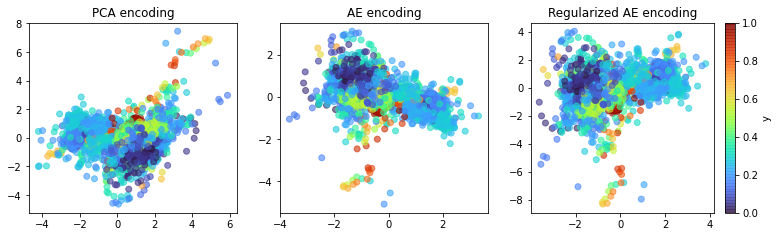

In [7]:
# Plotting latent representations
fig, axs = plt.subplots(1, 3, figsize=(14, 3.5), gridspec_kw={'width_ratios': [1, 1, 1.1]})
pca_plot = axs[0].scatter(encoded_features_pca[:, 0], encoded_features_pca[:, 1], c=y, cmap='turbo', alpha=0.6)
axs[0].set_title('PCA encoding')
sgd_plot = axs[1].scatter(encoded_features_ae[:, 0], encoded_features_ae[:, 1], c=y, cmap='turbo', alpha=0.6)
axs[1].set_title('AE encoding')
adam_plot = axs[2].scatter(encoded_features_ae_reg[:, 0], encoded_features_ae_reg[:, 1], c=y, cmap='turbo', alpha=0.6)
axs[2].set_title('Regularized AE encoding')
cbar = fig.colorbar(adam_plot)
cbar.ax.set_ylabel('y')
fig.subplots_adjust(right=0.85)
plt.show()